In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = np.ravel(Z)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.20)

In [4]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
y_preds = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_preds,y_test))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82        19
          1       0.90      0.87      0.89        31

avg / total       0.86      0.86      0.86        50



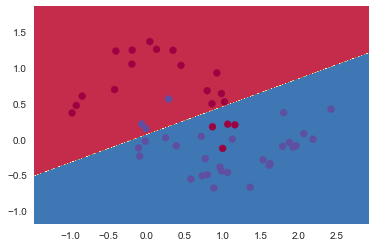

In [7]:
pred_func = lambda x: lr.predict(x)
plot_decision_boundary(pred_func,X_test,y_test)

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [9]:
X_train.shape

(150, 2)

In [10]:
model = Sequential()
model.add(Dense(2, input_shape = (2,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('softmax'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])


In [12]:
model.fit(X_train, y_train, epochs=2000, batch_size=1, verbose=False)

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)

32/50 [==================>...........] - ETA: 0s

In [14]:
loss

6.3769543838500979

In [15]:
accuracy

0.60000000119209285

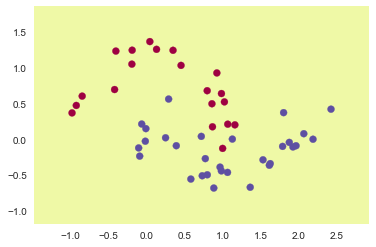

In [16]:
dec_fun_nn = lambda x: model.predict(x)
plot_decision_boundary(dec_fun_nn, X_test, y_test)
plt.show()

In [17]:
y_preds_nn = model.predict(X_test)
np.ravel(y_preds_nn)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)